# Data Analysis Methods
## \[5ARB0\] Data Acquisition and Analysis - Technical Assignment

In [11]:
# this cell imports the libraries or packages that you can use during this assignment
# you are not allowed to import additional libraries or packages
from helpers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

> **Important**
>
> Do not import any other packages or libraries than the ones already provided to you. You can only use the imported packages _after_ they have been imported.
>
> Write your code between the `BEGIN_TODO` and `END_TODO` markers. Do not change these markers.
>
> Restart your notebook and run all cells before submission.

## Introduction
In this assignment you will learn about different data analysis methods for creating a fall detector. 

This assignment is split into 4 parts. Part 1 will focus on principal component analysis and part 2 will introduce independent component analysis. Part 3 will guide you through implementing your own K-means algorithm. Finally, part 4 will introduce you to the Gaussian mixture model, which you will train using the expectation-maximization algorithm. In the next assignment, you will work on using these methods for creating a fall detector.


### Learning goals
After this assignment you can
- implement the PCA algorithm;
- determine a suitable number of PCA components;
- use PCA for image compression;
- use the ICA algorithm;
- explain differences between PCA and ICA;
- implement the K-means algorithm;
- explain issues and shortcoming of the K-means algorithm;
- implement the Gaussian mixture model for clustering;
- explain how the Gaussian mixture model differs from the K-means algorithm;
- apply both algorithms on a real data set;

## Part 1: Principal component analysis

Recorded data is often high-dimensional, leading to a large computational burden and limiting real-time data processing. Quite often we would therefore like to compress the data, such that it uses less memory. The creation of .zip-files on your computer is an example of data compression. In this part we will look at one method that achieves data compression, namely Principal component analysis (PCA). PCA is a useful technique for analyzing high-dimensional data, and compressing this data for storage or processing purposes. PCA aims to fit a orthogonal coordinate system to a dataset that best captures the variance or spread of the data. This approach is very closely related to the eigendecomposition of a matrix.

PCA aims to find the orthogonal directions of most variance of the dataset. Therefore it first computes the covariance matrix of the dataset, which can be estimated as
$$\Sigma = \mathrm{Cov}[{\bf{x}}] \approx \frac{1}{N-1} \sum_{n=1}^N ({\bf{x}}_n - \mathrm{E}[{\bf{x}}])({\bf{x}}_n - \mathrm{E}[{\bf{x}}])^\top,$$
where ${\bf{x}}_n$ is the $n$-th data sample and where $\mathrm{E}[{\bf{x}}]$ represents the expected value, or mean, which can be estimated as
$$\mathrm{E}[{\bf{x}}] \approx \frac{1}{N} \sum_{n=1}^N {\bf{x}}_n.$$
The covariance matrix captures the variances of the individual elements/features in ${\bf{x}}_n$ and the covariances between elements/features. 

Based on the obtained covariance matrix, you will perform an eigendecomposition. An eigenvalue decomposition finds a set of eigenvectors and corresponding eigenvalues. An eigenvector ${\bf{v}}$ and corresponding eigenvalue ${\lambda}$ of some square matrix $A$ satisfy the equation
$$A {\bf{v}} = \lambda {\bf{v}}.$$
In matrix notation, this can be written as
$$A Q = Q\Lambda,$$
where $Q$ is a orthonormal matrix where each column represents an eigenvector. Orthonormal refers to the individual eigenvectors being of unit length, and perpendicular to eachother. This matrix satisfies the useful properties $QQ^\top = Q^\top Q = I$ and $Q^\top = Q^{-1}$. $\Lambda$ is a diagonal matrix, whose diagonal contains the eigenvalues of $A$. The matrix $A$ can therefore be decomposed as 
$$A = Q\Lambda Q^\top$$

---
---
### Exercise 1.1: Compute eigenvalues and eigenvectors


Write a function `compute_eigen(X)` which computes the eigenvalues and eigenvectors of the covariance matrix of some dataset `X`. The dataset is a matrix of shape ($N\times M$), where $N$ denotes the number of data samples and $M$ the dimensionality of the features. The function should return a vector of length $M$ containing the eigenvalues and a matrix of shape ($M\times M$) containing the corresponding eigenvectors.

In [12]:
#// BEGIN_TODO [5ARB0_Analysis_1_1a] Compute eigenvalues and eigenvectors

def compute_eigen(X):
    ConvMatrix = np.cov(X)
    return np.linalg.eig(ConvMatrix)

#// END_TODO [5ARB0_Analysis_1_1a]

(array([ 1.49499356e+04+0.00000000e+00j,  4.65395177e-13+1.68039798e-12j,
         4.65395177e-13-1.68039798e-12j, -1.45559072e-12+4.49176857e-13j,
        -1.45559072e-12-4.49176857e-13j,  1.23577454e-12+0.00000000e+00j,
        -2.89230812e-13+9.49888508e-13j, -2.89230812e-13-9.49888508e-13j,
         5.68664100e-13+6.65576935e-13j,  5.68664100e-13-6.65576935e-13j,
         1.59740704e-13+7.58076846e-13j,  1.59740704e-13-7.58076846e-13j,
        -5.62067288e-13+2.14094622e-13j, -5.62067288e-13-2.14094622e-13j,
         5.57035176e-13+1.56933033e-13j,  5.57035176e-13-1.56933033e-13j,
         5.31558785e-13+0.00000000e+00j, -1.36715804e-13+4.29887287e-13j,
        -1.36715804e-13-4.29887287e-13j,  4.05027647e-13+0.00000000e+00j,
         9.72610667e-14+3.20185346e-13j,  9.72610667e-14-3.20185346e-13j,
        -3.40871903e-13+2.78817850e-14j, -3.40871903e-13-2.78817850e-14j,
         2.24159740e-13+2.06226355e-13j,  2.24159740e-13-2.06226355e-13j,
        -1.12361713e-13+2.89413250e-13

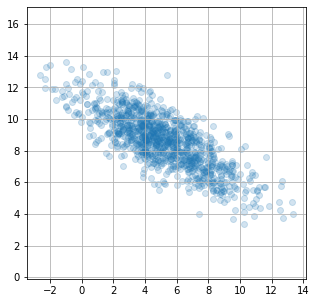

In [13]:
# generate data
X = ex11_generate_data()

# compute eigenvalues and eigenvectors
eigvals, eigvecs = compute_eigen(X)

# plot data
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], alpha=0.2)
#plot_eigen(np.mean(X, axis=0), eigvals, eigvecs, plt.gca(), width=0.1, color="r")
plt.axis("equal")
plt.grid()

# print eigenvalues and eigenvectors
eigvals, eigvecs

Have a look at the computed eigenvalues, eigenvectors and the visualization and answer the questions below:
- In what direction does the first eigenvector point?
- How can the eigenvalue be interpreted?

`#// BEGIN_TODO [5ARB0_Analysis_1_1b] Interpretation of eigenvalues and eigenvectors`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [5ARB0_Analysis_1_1b]`

### End of exercise 1.1
---
---

With the computed eigendecomposition, the original dataset can be transformed such that its new mean coincides with the origin (0,0) and that the new eigenvectors specify Euclidean standard basis vectors (i.e. the new covariance matrix is diagonal). The first step can be obtained by subtracting the mean from the dataset. The origin-centered dataset $\tilde{X}$ now is centered in the origin and therefore the covariance matrix can be estimated as 
$$ \tilde{\Sigma} = \mathrm{Cov}[\tilde{\bf{x}}] \approx \frac{1}{N-1} \tilde{X}^\top \tilde{X}\qquad\qquad \text{if }\mathrm{E}[\tilde{{\bf{x}}}] = {\bf{0}}$$
with the corresponding eigendecomposition $\tilde{\Sigma} = \tilde{Q} \tilde{\Lambda} \tilde{Q}^\top$.

If we multiply $\tilde{X}$ with $\tilde{Q}$ to get the transformed dataset $Y=\tilde{X}\tilde{Q}$, we observe that the new covariance matrix becomes
$$\mathrm{Cov}[{\bf{y}}] \approx \frac{1}{N-1} Y^\top Y = \frac{1}{N-1}\tilde{Q}^\top \tilde{X}^\top \tilde{X} \tilde{Q} = \tilde{Q}^\top\tilde{\Sigma}\tilde{Q} = \tilde{Q}^\top\tilde{Q} \tilde{\Lambda} \tilde{Q}^\top\tilde{Q} = \tilde{\Lambda},$$
which is diagonal.



---
---
### Exercise 1.2: Data transformation

Write a function `transform_PCA(X, mean, eigvecs)` which translates some dataset `X` to be centered in the origin, and rotates it, such that its new covariance matrix is diagonal. $X$ is of shape ($N\times M$), where $N$ denotes the number of data samples and $M$ the dimensionality of the features. The function should return the transformed dataset of shape ($N\times M$). Also create the function `inversetransform_PCA(X, mean, eigvecs)` which performs the inverse transform.

In [14]:
#// BEGIN_TODO [5ARB0_Analysis_1_2a] Transform data to PCA space

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_1_2a]

In [15]:
#// BEGIN_TODO [5ARB0_Analysis_1_2b] Transform data back from PCA space

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_1_2b]

In [16]:
# transform data
m = np.mean(X, axis=0)
eigvals, eigvecs = compute_eigen(X)
Y = transform_PCA(X, m, eigvecs)
Z = inversetransform_PCA(Y, m, eigvecs)

# plot transformed data
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(Y[:,0], Y[:,1], alpha=0.2)
eigvalsY, eigvecsY = compute_eigen(Y)
plot_eigen(np.mean(Y, axis=0), eigvalsY, eigvecsY, ax[0], width=0.1, color="r")
ax[1].scatter(Z[:,0], Z[:,1], alpha=0.2)
eigvalsZ, eigvecsZ = compute_eigen(Z)
plot_eigen(np.mean(Z, axis=0), eigvalsZ, eigvecsZ, ax[1], width=0.1, color="r")
ax[0].axis("equal"), ax[1].axis("equal")
ax[0].grid(), ax[1].grid();

NameError: name 'transform_PCA' is not defined

### End of exercise 1.2
---
---

So far PCA has only been discussed for a toy example. Let's now apply it to high-dimensional data. We will load a dataset containing 400 images of faces. These grayscale images are of size (64 $\times$ 64) and therefore contain 4096 pixels. In order to process the images, they have been flattened into vectors, which are appended to create a matrix containing 400 images. Below we have plotted the first 100 images:

In [ ]:
X = ex13_generate_data()
plot_faces(X)

---
---
### Exercise 1.3: Principal components analysis
Compute the eigenvalues and vectors of the faces dataset. Plot the first 350 eigenvalues with both a normal as log-scaling on the y-axis.

> Note: Since the dataset only contains 400 images, the covariance matrix of size (4096 $\times$ 4096) is not positive definite (although it should be in theory). Therefore the eigenvalues > 400 are basically useless, however, they are still computed as imaginary quantities. You can plot the real or absolute values of the eigenvalues.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_1_3a] Plot eigenvalues

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_1_3a]

Based on the created plots, what do you observe? How could this be useful for data compression?

`#// BEGIN_TODO [5ARB0_Analysis_1_3b] What do you observe?`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [5ARB0_Analysis_1_3b]`

### End of exercise 1.3
---
---

Now we will use PCA for data compression. Instead of performing the transform to the PCA space with the entire eigenvector matrix with shape (4096 $\times$ 4096), we only use the $K$ eigenvectors corresponding with the $K$ largest eigenvalues. 

---
---
### Exercise 1.4: Data compression
Compress the faces dataset using PCA in a matrix of shape (400 $\times$ $K$) and then decompress the data and plot the faces using the `plot_faces()` function. 

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_1_4a] Data compression

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_1_4a]

Analyze the results. What do you observe if you change $K$?

`#// BEGIN_TODO [5ARB0_Analysis_1_4b] What do you observe?`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [5ARB0_Analysis_1_4b]`

### End of exercise 1.4
---
---

## Part 2: Independent component analysis

Another approach of finding the most important components in a dataset is independent component analysis (ICA). Below you will use it to analyze a new data set.

---
---
### Exercise 2.1: Limitations PCA
Have a look at the dataset below. Would PCA be a good approach for finding the components of highest variance? Please motivate your answer.

In [ ]:
X = ex21_generate_data()
plt.scatter(X[:,0], X[:,1], alpha=0.1)
plt.grid(True)
plt.axis("equal");

`#// BEGIN_TODO [5ARB0_Analysis_2_1] Limitations PCA`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [5ARB0_Analysis_2_1]`

### End of exercise 2.1
---
---

In [ ]:
from sklearn.decomposition import PCA, FastICA

> Note: From this moment onwards you can use the `PCA` and `FastICA` functions from `sklearn`.

---
---
### Exercise 2.2: PCA versus ICA
Use the `PCA` and `FastICA` functions from `sklearn` to create the objects `pca_object` and `ica_object`, each with two components. Fit these objects to the dataset and transform the dataset. Save the transformed dataset into the variables `data_transformed_pca` and `data_transformed_ica`.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_2_2a] PCA and ICA

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_2_2a]

In [ ]:
_, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].scatter(X[:,0], X[:,1], alpha=0.1)
ax[1].scatter(data_transformed_pca[:,0], data_transformed_pca[:,1], alpha=0.1)
ax[2].scatter(data_transformed_ica[:,0], data_transformed_ica[:,1], alpha=0.1)
plot_pca(ax[0], pca_object, np.mean(X, axis=0))
plot_ica(ax[0], ica_object, np.mean(X, axis=0))
ax[0].grid(True), ax[1].grid(True), ax[2].grid(True)
ax[0].axis('equal'), ax[1].axis('equal'), ax[2].axis('equal')
ax[0].set_title("original data"), ax[1].set_title("transformed data (PCA)"), ax[2].set_title("transformed data (ICA)");

Run your code a couple of times. What do you observe? Which method works best for this data set?

`#// BEGIN_TODO [5ARB0_Analysis_2_2b] PCA versus ICA`

<div class='alert alert-warning' role='alert'>Replace this line by your text.</div>

`#// END_TODO [5ARB0_Analysis_2_2b]`

### End of exercise 2.2
---
---

## Part 3: K-means algorithm
In this part we will discuss unsupervised machine learning problems and describe how the K-means algorithm can be used to solve these.

Unsupervised machine learning problems are problems in which we try to determine some particular structure within a data set. On the contrary, supervised machine learning problems require us to model some kind of input-output mapping. Unsupervised machine learning problems do not have a specified output which we would like to model. Instead we are interesting in making sense of the data in grouping this data, without knowing beforehand which and how many groups exist.

The K-means algorithm can group $N$ data samples of dimension $D$ into $K$ groups or clusters. These clusters can each be characterized by their mean vector: the expected or average value of the points which are assigned to the cluster. The mean vector denoting the center of the $k^{th}$ cluster can be represented as the column vector ${\bf{\mu}}^{(k)} = [\mu_1^{(k)},\ \mu_2^{(k)},\ \ldots, \mu_D^{(k)}]^\top$ and the $n^{th}$ data sample can be represented by the column vector ${\bf{x}}^{(n)} = [x_1^{(n)},\ x_2^{(n)},\ \ldots, x_D^{(n)}]^\top$, where the superscript denotes the sample index.

The K-means algorithm tries to minimize the (within-cluster) Euclidean squared distance
$$J({\bf{X}}, {\bf{\mu}}) = \frac{1}{N}\sum_{n=1}^N \sum_{k=1}^K \rho_k^{(n)} \| {\bf{x}}^{(n)} - {\bf{\mu}}^{(k)}\|^2$$
Here $\rho_k^{(n)}$ is a so-called indicator function that is defined as 
$$ \rho_k^{(n)} = \begin{cases} 1 & \text{if sample }{\bf{x}}^{(n)}\text{ is assigned to cluster }k \\ 0 & \text{otherwise}\end{cases}$$
This indicator function equals $1$ when the corresponding data point is assigned to the corresponding cluster and $0$ otherwise. The cost function therefore represents the average squared distance with respect to the cluster that a point is assigned to.

The algorithm is specified as follows:

1. Initialize means ${\bf{\mu}}$.
2. Assign data points to closest cluster mean (i.e. update $\rho_k^{(n)}$).
3. Calculate new cluster means as the average values of the points that are assigned to it (i.e. update ${\bf{\mu}}$).
4. Calculate cost function $J({\bf{X}}, {\bf{\mu}})$.
5. If not converged, go back to 2 and repeat.

Here we will describe the algorithm in words. First the centers of the clusters are initialized. This can be done arbitrarily, but often the centers are set to random (but distinct) samples of the data set.
Once the means are set, we assign each data sample to the cluster that is closest to it. In order to do so, we calculate the Euclidean squared distance between a point and all the clusters and find the cluster that is closest to it. We repeat this for all points and we therefore completely specify $\rho_k^{(n)}$. Once all points have been assigned to a cluster, we look up all points corresponding to a certain cluster and we average these to calculate the new cluster center. We update all cluster means. Then we evaluate the current fit of the clusters on the data by evaluate the cost function. If we still see a significant improvement in the cost function, we repeat updating the assignments and cluster centers and if the cost function seems to have converged, we stop iterating.

In this part of the assignment you will implement the K-means algorithm from scratch, starting with the initialization of the cluster means.


---
---
### Exercise 3.1: Initializing cluster centers
Consider the function `X = ex3_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `means = initialize_means(X, K)` that accepts the data set ${\bf{X}}$  and number of clusters $K$ as input and returns a matrix of shape (K x D), representing the vertical concatenation of $K$ transposed mean vectors of dimension $D$. These means should be initialized such that they coincide with *random* samples from the data set, which are always *distinct*. In other words, the means should equal a random subset of the availabe data set, where no means are equal. Also keep in mind that the number of clusters is variable in this function.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_1] Complete the function initialize_means(X, K)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_1]

In [ ]:
# generate data
X = ex3_generate_data()

# initialize means
means = initialize_means(X, 3)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10)
plt.scatter(means[:,0], means[:,1], c="red", marker="x")
plt.grid()

### End of exercise 3.1
---
---

Now that the clusters have been initialized, it is time to assign points to the closest clusters.

---
---
### Exercise 3.2: Assign points to clusters
Again consider the function `X = ex4_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `rho = assign_data_to_clusters(X, means)` that accepts the data set ${\bf{X}}$ and matrix of means ${\bf{\mu}}$ as input and returns a matrix of shape (N x K), which contains all indicator functions $\rho_k^{(n)}$. This matrix should be a matrix of only ones and zeros and each row should sum to 1.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_2] Complete the function assign_data_to_clusters(X, means)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_2]

In [ ]:
# generate data
X = ex3_generate_data()

# initialize means
means = initialize_means(X, 3)

# assign point to clusters
rho = assign_data_to_clusters(X, means)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
plt.scatter(means[:,0], means[:,1], c="red", marker="x")
plt.grid()

### End of exercise 3.2
---
---

The means have been initialized, the point have been assigned to a cluster. Now the cluster centers can be updated.

---
---
### Exercise 3.3: Update cluster centers

Again consider the function `X = ex3_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ data vectors of dimension $D$. Create a function `means = update_cluster_centers(X, rho)` that accepts the data set ${\bf{X}}$ and matrix of indicators $\rho$ as input and returns a matrix of shape (K x D), which contains the new cluster centers.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_3] Complete the function update_cluster_centers(X, rho)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_3]

In [ ]:
# generate data
X = ex3_generate_data()

# initialize means
means = initialize_means(X, 3)

# assign point to clusters
rho = assign_data_to_clusters(X, means)

# update means
means_new = update_cluster_centers(X, rho)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
plt.scatter(means[:,0], means[:,1], 50, c="red", marker="x")
plt.scatter(means_new[:,0], means_new[:,1], 50, c="blue", marker="x")
plt.grid()

### End of exercise 3.3
---
---

Almost there! Now it is just a matter of combining the previous functions for finalizing the K-means algorithms.

---
---
### Exercise 3.4: Implement K-means algorithm

First create a function `J = Kmeans_loss(X, means, rho)` that calculates the within-cluster Euclidean squared distance as defined above. Secondly create the final `means, rho, J = Kmeans(X, K)` function that combines all previous functions to create the K-means algorithm as specified in the the introduction of this part of the assignment. This function returns the final cluster centers, the indicator function and a history of the losses. Save the loss *after* each iteration and stop iterating when the difference in loss does no longer exceed 1e-10. The initial loss based on the randomly initialized means should not be returned.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_4a] Complete the Kmeans_loss(X, means, rho) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_4a]

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_4b] Complete the Kmeans(X, K) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_4b]

In [ ]:
# generate data
X = ex3_generate_data()

# initialize means
means, rho, J = Kmeans(X, 3)

# plot data
_,ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
ax[0].scatter(means[:,0], means[:,1], 50, c="red", marker="x")
ax[1].plot(J)
ax[0].grid(), ax[1].grid(), ax[1].set_ylabel("cost function"), ax[1].set_xlabel("iteration");

### End of exercise 3.4
---
---

---
---
### Exercise 3.5: Number of clusters
In the previous assignment the data had been generate from 3 clusters. In practice the number of clusters is often unknown. In this exercise we will see what happens when we add extra clusters. In this exercise, run your K-means algorithm on the previous data set for 2 up to and including 10 clusters and save the final value of the loss (i.e. the loss value when the algorithm has converged).

Plot the final loss against the number of used clusters.

In [ ]:
# generate data
X = ex3_generate_data()

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_5a] Plot the Kmeans loss against the number of clusters

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_5a]

Does the loss give a good impression of how many clusters can be found in the data set?

1. Yes, the loss tells us how good the data is represented. As the loss decreases, the model becomes better at representing the data. Therefore the final loss provides a good indication how many clusters are desirable.
2. Yes, if we have a very large number of clusters, the loss can be brought to zero, leading to a perfect representation of the data.
3. No, the loss function only decreases and does not take into account the complexity introduced by adding more clusters.
4. All of the above answers are correct.
5. None of the above answers are correct

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_5b] Finding an appropriate number of clusters

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_5b]

How can we find an appropriate number of clusters for representing some data set?

1. We select the number of clusters where the loss function begins to increase.
2. We can monitor the loss function and select the number of clusters for which it obtains its lowest value. The corresponding number of clusters is an appropriate number of clusters.
3. We could add a penalty term for the number of clusters to the cost and then select the lowest value.
4. All of the above answers are correct.
5. None of the above answers are correct

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_5c] how can we find the number of clusters

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_5c]

### End of exercise 3.5
---
---

---
---
### Exercise 3.6: Shortcoming of the K-means algorithm
Apply the Kmeans algorithm for the new data set generate by `X = ex36_generate_data()`. Visualise the data and come up with an appropriate number of clusters. Plot the data points in a scatter plot, plot the means as red crosses in the same plot and color the data point according to their assigned cluster.

In [ ]:
# generate data
X = ex36_generate_data()

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_3_6a] Plot clusters of new data set

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_3_6a]

### End of exercise 3.6
---
---

## Part 4: Gaussian Mixture modeling
The Kmeans algorithm is a very fast and simple algorithm that works well for many applications. However, because of its simplicity it is not suitable for all situations, such as the one described in exercise 1.6. In this part we present another methodology for clustering data, namely through Gaussian mixture modeling. In this approach we do not rely on a deterministic algorithm for determining the cluster means and assignments, but instead we model the data set by a probability density function.

We will assume that the data set has been generated from a Gaussian mixture model, which is formally specified as
$$ p({\bf{x}}^{(n)}) = \sum_{k=1}^K \rho_k \mathcal{N}({\bf{x}}^{(n)} \mid {\bf{\mu}}_k, \Sigma_k),$$
where a data sample ${\bf{x}}^{(n)}$ is originating from a Gaussian mixture model with $K$ individual Gaussian distributions with means ${\bf{\mu}}_k$ and covariance matrices ${\bf{\Sigma}}_k$. The mean denotes the center or mode of the Gaussian distribution and the covariance matrix specifies the strech and tilt of the Gaussian distribution. In this model the mixing coefficients $\rho_k$ specify how much each of the Gaussian distributions contributes in the model. Because the Gaussian mixture model is a probability density function, integrating over ${\bf{x}}$ should always equal 1. Because the individual Gaussians already satisfy this requirement, the mixing coefficients are constrained by
$$ \sum_{k=1}^K \rho_k = 1.$$
To give some intuition on this model, we give a 1-dimensional example below. Here we model a data set by a mixture of 2 Gaussians. The individual *weighted* Gaussian distributions are colored in blue and the corresponding mixture model distribution is colored in red.

In [ ]:
ex4_plot_GMM_1D()

During this part of the assignment you will implement the so-called Expectation-Maximization (EM) algorithm for learning the Gaussian mixture model. This algorithm consists of two step, the expectation step (E-step) and the maximization step (M-step). The exact details of the algorithm are beyond the scope of this assignment, but here we will present the update equations for these steps.

The EM algorithm works as follows:

1. Initialize the means ${\bf{\mu}}_k$, covariances $\Sigma_k$ and mixing coefficients $\rho_k$. Often the means are initialized using the Kmeans algorithm. The covariance matrices can be set to identity matrices and the mixing coefficients can be initialized to the fraction of points assigned to the cluster with Kmeans divided by the total number of samples.
2. *Expectation step*: evaluate the responsibilities $\gamma_{nk}$ using the current parameter values as 
$$ \gamma_{nk} = \frac{\rho_k \mathcal{N}({\bf{x}}_n \mid {\bf{\mu}}_k, \Sigma_k)}{\sum_{j=1}^K \rho_j \mathcal{N}({\bf{x}}_n \mid {\bf{\mu}}_j, \Sigma_j)}$$
3. *Maximization step*: re-estimate the parameters using the current responsibilities
$$ {\bf{\mu}}_k^\text{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk}{\bf{x}}_n $$
$$ \Sigma_k^\text{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk} ({\bf{x}}_n - {\bf{\mu}}_k^\text{new})({\bf{x}}_n - {\bf{\mu}}_k^\text{new})^\top $$
$$ \rho_k = \frac{N_k}{N} $$
where $N$ denotes the number of samples and where
$$ N_k = \sum_{n=1}^N \gamma_{nk}$$
4. Evaluate the log-likelihood
$$ \ln p({\bf{X}} \mid {\bf{\mu}}, \Sigma, {\bf{\rho}}) = \sum_{n=1}^N \ln \left\{ \sum_{k=1}^K \rho_k \mathcal{N}({\bf{x}}^{(n)} \mid {\bf{\mu}}_k, \Sigma_k)\right\}$$

It is important to grasp what is going on in this algorithm. The responsibilities $\gamma_{nk}$ are similar to the indicator functions from the Kmeans algorithm. However, where the Kmeans algorithm performs a hard clustering (each point can be assigned to only 1 cluster), the Gaussian mixture model allows for a soft clustering (each point can be modeled by both Gaussian distribution, but just to a different extent). The indicator function of the Kmeans algorithm was one-hot coded, meaning that a point was assigned to 1 cluster only. The responsibilities $\gamma_{nk}$ specify how likely a data sample ${\bf{x}}_n$ is to be generated from a cluster. With a Gaussian mixture model a point can therefore be assigned to different extents to multiple clusters. The expectation step calculates these responsibilities and the division in this expression makes sure that all rows sum op to 1.

In the maximization step the parameters are updated. Here the contribution of each data sample towards the parameters depends on the corresponding responsibilities. This means that a point that is very likely to have originated from a certain cluster will have a high influence on the statistics of that cluster. The variable $N_k$ specifies how many points are located to a certain Gaussian distribution. Because this parameter is the summation over the individual responsibilities, $N_k$ is not forced to be an integer.

The log-likelihood is a cost function which takes the variances and uncertainties in our model into account. It describes the probability of that data set being generated from a Gaussian mixture model. To prevent numerical instability we commonly use the log-likelihood instead of the normal likelihood.


---
---
### Exercise 4.1: Initialize clusters
Consider the function from the previous part `X = ex46_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `means, covs, rho = initialize_GMM(X, K)` that accepts the data set ${\bf{X}}$ as input and returns the following in this order:
- `means`: a matrix of size (K x D) that contains the initial cluster means, as a vertical concatenation of the transposed mean vectors. These means should be initialized using the previously written K-means algorithm.
- `covs`: a matrix of size (K x D x D) that contains the covariance matrices of the initial clusters. Each matrix `covs[k,:,:]` represents the covariance matrix of the $k^\text{th}$ cluster. Initialize these covariance matrices as identity matrices.
- `rho`: a vector of length K that contains the mixing coefficients as specified above. Initialize this vector based on the indicator function returned by the K-means algorithm.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_4_1] Complete the initialize_GMM(X, K) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_4_1]

In [ ]:
# fetch data
X = ex36_generate_data()

# initialize GMM
means, covs, rho = initialize_GMM(X, 2)

# plot GMM
ex4_plot_GMM(X, means, covs, rho)

### End of exercise 4.1
---
---

---
---
### Exercise 4.2: Expectation step
Create a function `gamma = expectation_step(X, means, covs, rho)` that accepts the data set, means, covariances and mixing coefficients with dimensions specified above. This function should perform the expectation step and should return the calculated responsibilities as defined above as a matrix of size (N x K) where each row corresponds to the assignment fraction of a sample amongst the different clusters. Make sure this matrix is properly normalized such that the elements in each row add up to 1. Use the `multivariate_normal` function that has been imported from `scipy.stats` at the beginning of this notebook.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_4_2] Complete the expectation_step(X, means, covs, rho) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_4_2]

In [ ]:
gamma = expectation_step(X, means, covs, rho)

### End of exercise 4.2
---
---

---
---
### Exercise 4.3: Maximization step
Create a function `means, covs, rho = maximization_step(X, gamma)` that accepts the data set and responsibilities with dimensions specified above. This function should perform the maximization step and should return the new means, covariances and mixing coefficients with dimensions as specified above.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_4_3] Complete the maximization_step(X, gamma) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_4_3]

In [ ]:
# maximization step
means, covs, rho = maximization_step(X, gamma)

# plot GMM
ex4_plot_GMM(X, means, covs, rho)

### End of exercise 4.3
---
---

---
---
### Exercise 4.4: Log-likelihood calculation
Create a function `J = loglikelihood(X, means, covs, rho)` that accepts the data set, means, covariance matrices and mixing coefficients with dimensions specified above. This function should calculate and return the log-likelihood of the data under the specified Gaussian mixture model. Use the definition as specified in the beginning of Part 2.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_4_4] Complete the loglikelihood(X, means, covs, rho) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_4_4]

### End of exercise 4.4
---
---

---
---
### Exercise 4.5: Gaussian mixture modeling
Now that all the subfunctions have been defined it is time to tie them together and to form a function which does the Gaussian mixture modelling. Create a function `means, covs, rho, gamma, J = GMM_modeling(X, K, nr_iterations)` that does the following:

1. Initialize the parameters of the Gaussian mixture model.
2. Performs `nr_iterations` iterations of the following:
    1. Perform the expectation step.
    2. Perform the maximization step.
    3. Calculate the log-likelihood.
3. returns the parameters and a vector of saved values of the log-likelihood.

The function should return all the parameters of the trained Gaussian mixture model, containing the final means, covariance matrices, mixing coefficients, responsibilities and a vector containing all calculated values of the log-likelihood.

In [ ]:
#// BEGIN_TODO [5ARB0_Analysis_4_5] Complete the GMM_modeling(X, K, nr_iterations) function

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_Analysis_4_5]

In [ ]:
# train GMM
means, covs, rho, gamma, J = GMM_modeling(X, 2, 10)

# plot GMM
ex4_plot_GMM(X, means, covs, rho)

In [ ]:
plt.figure()
plt.plot(J)
plt.grid(), plt.xlabel("iteration"), plt.ylabel("log-likelihood");

### End of exercise 4.5
---
---

>   Make sure to restart this notebook and to rerun all cells before submission to check whether all code runs properly.